In [17]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import folium
from folium import plugins
from shapely.geometry import Point

# Outline

Examples created based on GPS trajectory dataset collected in (Microsoft Research Asia) Geolife project by 182 users in a period of over
three years (from April 2007 to August 2012). Contains 18670 files and 24.876.978 positions. See [data/README.md](data/README.md)


1. [Preprocess data into parquet files](data/preprocess-geolife_trajectories-data.py)
1. Read the data and explore it (below)
1. Basic plotting with matplotlib, cartopy and geopandas (below)
1. Folium (below) - interactive maps
1. [bokeh -  interactive visualization library](2-bokeh-demo.py)
1. [Datashader/holoviews - plotting very large datasets](3-datashader-holoviews.ipynb) (Does not render correctly in jupyter-lab, but works in jupyter-notebook)
1. [Datashader zoom movie](4-datashader-movie-zoom.ipynb)
1. [Datashader timeseries movie](5-datashader-movie-timeseries.ipynb)
1. [kepler.gl - interactive HTML map with controls](6-kepler.ipynb) (Does not render in jupyter-lab, but works in jupyter-notebook. Output HTML works in either case)
1. [Custom contour map in folium](http://www.tjansson.dk/2018/10/contour-map-in-folium/)


# Read the dataset

In [18]:
df = pd.read_parquet('data/geolife_trajectories_1_3.parquet')
print(df.shape[0])
df.head()

24876978


,lat,lon,datetime,altitude_meters,tripId,userId
0,39.865797,116.393328,2008-12-14 09:34:22,305.98872,018_20081214093422,018
1,39.865798,116.393328,2008-12-14 09:34:23,305.98872,018_20081214093422,018
2,39.865833,116.393245,2008-12-14 09:34:41,305.98872,018_20081214093422,018
3,39.865847,116.393148,2008-12-14 09:34:51,305.98872,018_20081214093422,018
4,39.866112,116.389852,2008-12-14 09:43:46,305.98872,018_20081214093422,018


In [19]:
df.tripId.nunique()

18670

In [20]:
df.userId.nunique()

182

In [21]:
df.dtypes

lat                       float64
lon                       float64
datetime           datetime64[ns]
altitude_meters           float64
tripId                     object
userId                     object
dtype: object

In [22]:
## Make smaller datasets for inefficient plottting tools
df_small = df.head(5000)
df_small

,lat,lon,datetime,altitude_meters,tripId,userId
0,39.865797,116.393328,2008-12-14 09:34:22,305.98872,018_20081214093422,018
1,39.865798,116.393328,2008-12-14 09:34:23,305.98872,018_20081214093422,018
2,39.865833,116.393245,2008-12-14 09:34:41,305.98872,018_20081214093422,018
3,39.865847,116.393148,2008-12-14 09:34:51,305.98872,018_20081214093422,018
4,39.866112,116.389852,2008-12-14 09:43:46,305.98872,018_20081214093422,018
...,...,...,...,...,...,...
4995,39.935858,116.483670,2008-12-01 02:43:04,33.00984,018_20081201011607,018
4996,39.935682,116.483663,2008-12-01 02:43:05,33.00984,018_20081201011607,018
4997,39.935507,116.483663,2008-12-01 02:43:06,33.98520,018_20081201011607,018
4998,39.935328,116.483665,2008-12-01 02:43:07,33.98520,018_20081201011607,018


# Matplotlib

Old faithfull of plotting, but not very interesting.

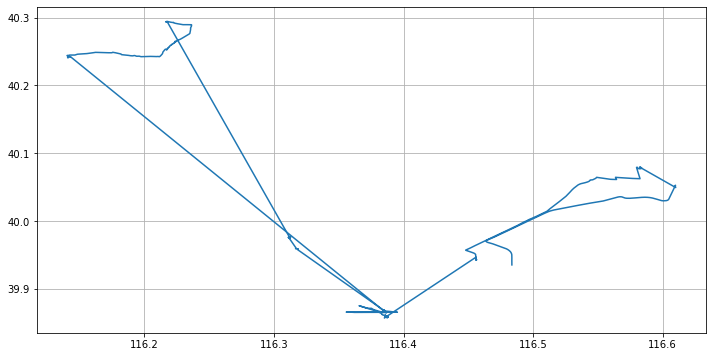

In [23]:
plt.figure(figsize = (12, 6))
plt.plot(df_small.lon, df_small.lat)
plt.grid()

# Cartopy

Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

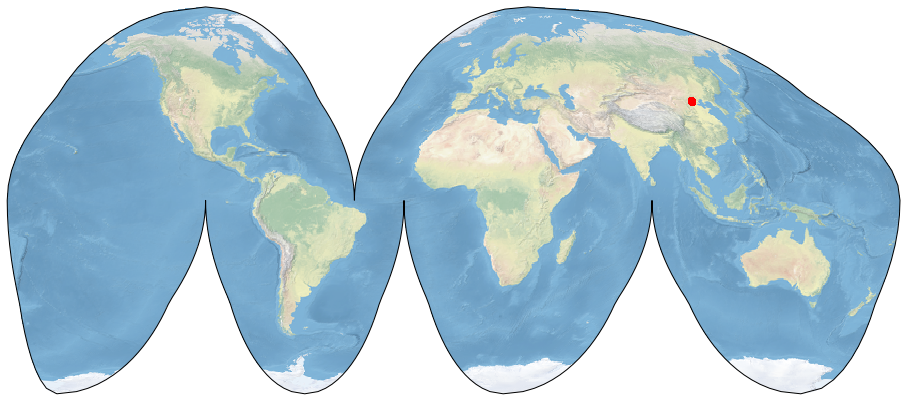

In [24]:
plt.figure(figsize = (16, 9))
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.stock_img()

plt.plot(df_small.lon.values.tolist(), df_small.lat.values.tolist(),
         color='red', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),)

plt.show()

# GeoPandas

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

A GeoDataFrame needs a shapely object. We use geopandas `points_from_xy()` to transform longitude and latitude into a list of shapely `Point` objects and set it as a geometry while creating the GeoDataFrame.

In [25]:
gdf = gpd.GeoDataFrame(df_small, geometry=gpd.points_from_xy(x=df_small.lon, y=df_small.lat))
print(gdf.shape[0])
gdf.head()

5000


,lat,lon,datetime,altitude_meters,tripId,userId,geometry
0,39.865797,116.393328,2008-12-14 09:34:22,305.98872,018_20081214093422,018,POINT (116.39333 39.86580)
1,39.865798,116.393328,2008-12-14 09:34:23,305.98872,018_20081214093422,018,POINT (116.39333 39.86580)
2,39.865833,116.393245,2008-12-14 09:34:41,305.98872,018_20081214093422,018,POINT (116.39324 39.86583)
3,39.865847,116.393148,2008-12-14 09:34:51,305.98872,018_20081214093422,018,POINT (116.39315 39.86585)
4,39.866112,116.389852,2008-12-14 09:43:46,305.98872,018_20081214093422,018,POINT (116.38985 39.86611)


In [26]:
print(gpd.datasets.available)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

['naturalearth_lowres', 'naturalearth_cities', 'nybb']


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


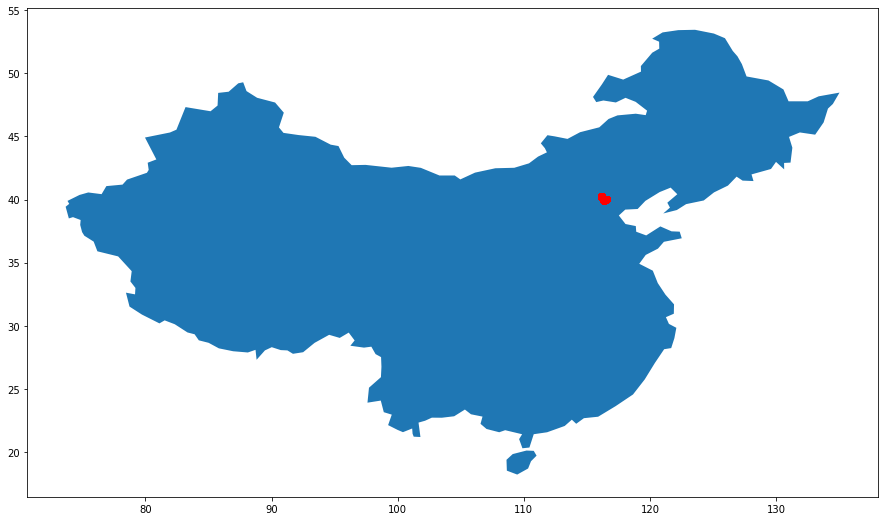

In [27]:
# Get the outline of China
ax = world[world.name == 'China'].plot(figsize=(16, 9))
gdf.plot(color='red', ax=ax);

# Folium

folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in a Leaflet map via folium.

folium enables passing any HTML object as a popup, including `bokeh` plots, but there is a built-in support for vincent and altair visualizations to any marker type, with the visualization as the popover. So a popup could show a graph or rich text field. 

Many examples:
https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/


In [30]:
m = folium.Map(# m = folium.Map([22.813473, 108.333078], zoom_start=15) or use m.fit_bounds(m.get_bounds())
    tiles='OpenStreetMap', # Default
    #tiles='Stamen Toner',
    #tiles='Stamen Terrain',
    #tiles='Mapbox Bright', API_key= os.environ['MAPBOX_API_KEY'],
)

# Select some trips
trips = df.tripId.unique().tolist()[2:3]

for trip in trips:
    df_plot = df[df.tripId == trip]

    # Format data as a list of tupples
    line_data = list(df_plot[['lat', 'lon']].itertuples(index=False, name=None))

    # Plot all the points as simple circles
    df_plot.apply(lambda row:folium.CircleMarker(location=[row['lat'], row['lon']]).add_to(m), axis=1)

    # Plot a normal static layover
    #folium.PolyLine(line_data, weight=15).add_to(m)

    # Plot as fancy AntPath
    #folium.plugins.AntPath(locations=line_data, reverse='True', dash_array=[20, 30]).add_to(m)

    # Clustering of points
    #folium.plugins.FastMarkerCluster(df_plot[['lat', 'lon']].values.tolist()).add_to(m)


m.fit_bounds(m.get_bounds())
#m.save('data/folium_simple_line.html')
m

In [29]:
m = folium.Map()

# Saving lat e lon and removing NaN
heatmap = [[la,lo] for la,lo in zip(df_small.lat, df_small.lon)]

# plot heatmap
folium.plugins.HeatMap(heatmap, radius=15).add_to(m)
m.fit_bounds(m.get_bounds())
m